In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [6]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train_full.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
# create validation data:
x_valid,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test/255.

In [10]:
len(x_valid)

5000

In [11]:
len(x_train)

55000

In [12]:
len(x_test)

10000

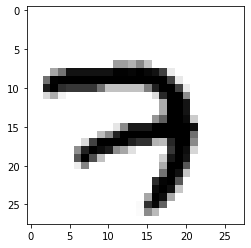

In [15]:
plt.imshow(x_train[0],cmap='binary')

<AxesSubplot:>

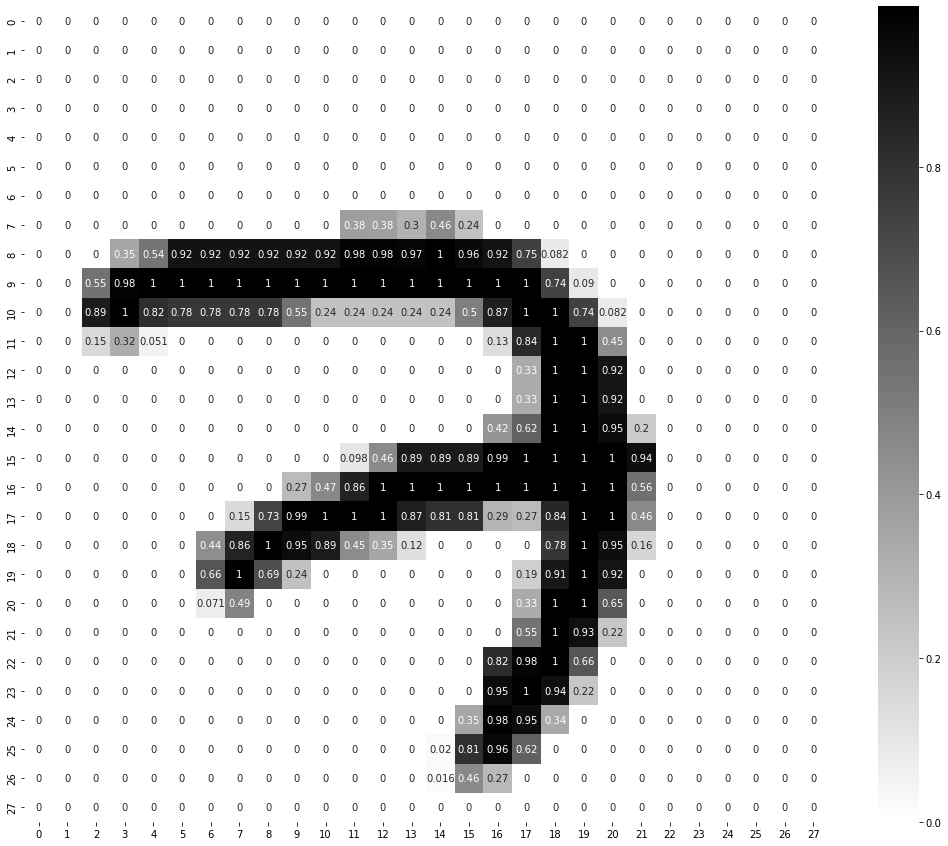

In [20]:
plt.figure(figsize=(18,15))
sns.heatmap(x_train[0],annot=True,cmap='binary')

In [21]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [25]:
# LAYERS:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='input_layer'),
        tf.keras.layers.Dense(300,activation='relu',name='hidden_layer_1',kernel_regularizer=regularizers.L2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation='relu',name='hidden_layer_2'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax',name='output_layer')
]
model_clf=tf.keras.models.Sequential(LAYERS)

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()
model.add(Flatten(input_shape=[28,28],name='input_layer'))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.L2(1e-4)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
model.add(Dropout(0.1))
model.add(Dense(units=16,activation='relu',kernel_regularizer=regularizers.L1(1e-5)))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)               

In [29]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['accuracy']

model.compile(loss=LOSS_FUNCTION,
             optimizer=OPTIMIZER,
             metrics=METRICS)

In [30]:
EPOCHS=5
VALIDATION_SET=(x_valid,y_valid)

history=model.fit(x_train,y_train,epochs=EPOCHS,
                 validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 [==============================] - 5s 2ms/step - loss: 1.3577 - accuracy: 0.5415 - val_loss: 0.5432 - val_accuracy: 0.8710
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7253 - accuracy: 0.7718 - val_loss: 0.3726 - val_accuracy: 0.9068
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5864 - accuracy: 0.8254 - val_loss: 0.3072 - val_accuracy: 0.9234
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5162 - accuracy: 0.8514 - val_loss: 0.2636 - val_accuracy: 0.9358
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8661 - val_loss: 0.2393 - val_accuracy: 0.9406


In [31]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.357687,0.541491,0.543222,0.8710
1,0.725274,0.771764,0.372631,0.9068
2,0.586439,0.825382,0.307210,0.9234
3,0.516174,0.851382,0.263570,0.9358
4,0.469158,0.866127,0.239278,0.9406


<AxesSubplot:>

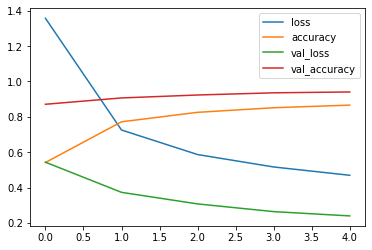

In [33]:
pd.DataFrame(model.history.history).plot()